# Data Visualisation Segmentation Project
## Leaf Rot Recognition

#### Group: Biddiscombe, Gritti

In [7]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt

# Image visualisation and manipulation
from PIL import Image
# import av
# import skimage


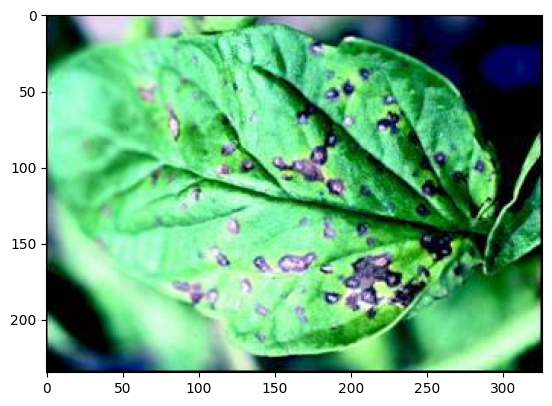

In [13]:
# Display an image to test correctness
path_to_images = "data/data/images/"
path_to_masks = "data/data/masks/"
image_0_path = path_to_images + "00000.jpg"
image_0 = Image.open(image_0_path)

plt.imshow(image_0)
plt.show()

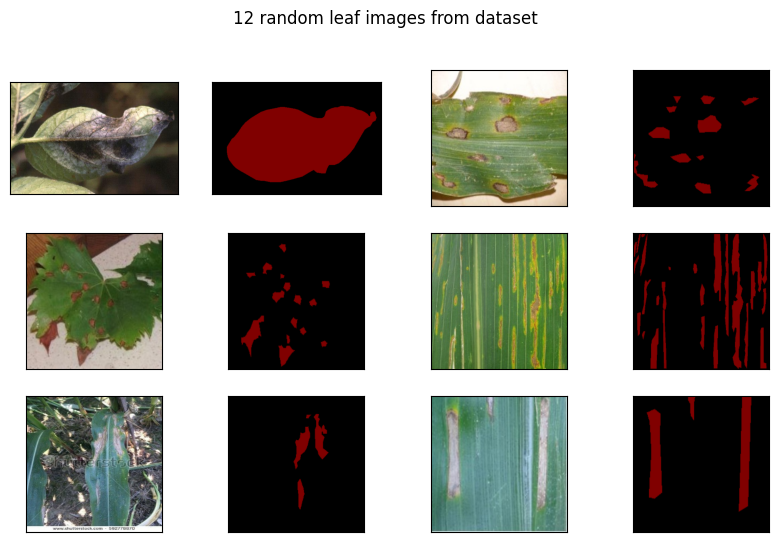

In [15]:
nr_imgs = 588

random_selection = []

plt.figure(figsize=(10,6))

i = 0

while len(random_selection) < 6:
    rand_nr = np.random.randint(nr_imgs)
    if rand_nr in random_selection:
        continue
    
    i += 1
    random_selection.append(rand_nr)
    plt.subplot(3,4,i)
    img = Image.open(path_to_images + f"{rand_nr:05d}.jpg")
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

    i += 1
    plt.subplot(3,4,i)
    img = Image.open(path_to_masks + f"{rand_nr:05d}.png")
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

plt.suptitle("12 random leaf images from dataset")
plt.show()

In [ ]:
def plot_random_selection(im_number=588, nr_to_plot=6, 
                          ims_path="data/data/images/", 
                          masks_path="data/data/masks/", 
                          img_name="",
                          mask_name=""):
    
    x_plots = int(round(np.sqrt(nr_to_plot) + 0.4))
    y_plots = int(round(nr_to_plot / x_plots + 0.4))

    plt.figure(figsize=(10,4))
    random_selection = []
    i = 0

    while len(random_selection) < nr_to_plot:
        rand_nr = np.random.randint(im_number)
        if rand_nr in random_selection:
            continue
        
        random_selection.append(rand_nr)
        
        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        img = Image.open(ims_path + f"{img_name}{rand_nr:05d}.jpg")
        plt.imshow(img)
        # plt.title(f"leaf {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])

        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        img = Image.open(masks_path + f"{mask_name}{rand_nr:05d}.png")
        plt.imshow(img)        
        # plt.title(f"mask {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle(f"{nr_to_plot} random images from dataset, with masks")
    # plt.tight_layout()
    plt.show()


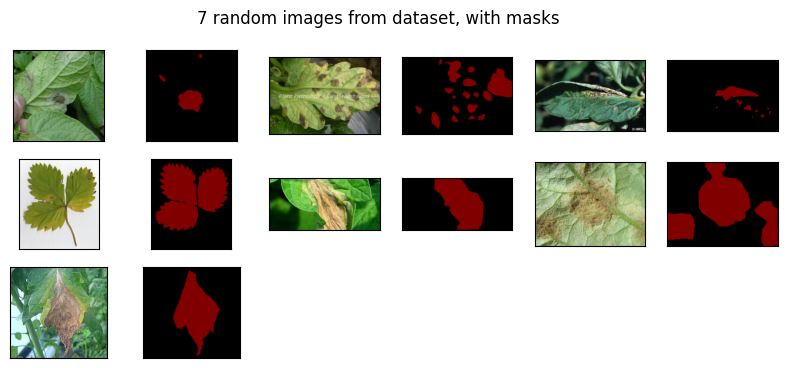

In [84]:
plot_random_selection(ims_path = path_to_images, masks_path=path_to_masks, im_number=588, nr_to_plot=7)

In [ ]:
path_to_ims_2 = "data/1/data1/imgs/"
path_to_masks_2 = "data2/data2/masks/"

### Note: structure and restructuring of the data
The data we downloaded from Kaggle.com (https://www.kaggle.com/datasets/chzili/dataset-for-tobacco-leaf-disease-segmentation) contains 2 main directories: data1 and data2.

The data contains images for tobacco leaves disease segmentation.

##### data1 contents:
The folder data1 contains a folder of images and one of masks, each containing 3 types of images, separated by name but very similar in contents. All images (in the images subfolder) display square slices of pictures of tobacco leaves, with and without disease spots, which are mirrored by the mask folder, which highlight the disease spots on the leaves. The 3 types of images are augmented, IMG and A, we call them this because the naming system follows the type "augmented_{identifier}.png", "IMG_{identifier}.png", and "A_{identifier}.png". 

For the purposes of the project, we will move all images and masks of the augmented type into a separate folder, and rename IMG and A files for ease of use.

<h5>data2 contents: </h5>
The folder data2 contains aumented images and masks. We will be ignoring this folder, as it does not serve our purposes for the Computer VIsion project.



In [8]:
# trying to use it on new data
path_to_images = "data_1291_leafs/img_scab/"
path_to_masks = "data_1291_leafs/masks_machine_scab/"

img_name_system = "Train_" # Train_0.jpg, Train_1820.jpg
mask_name_system = "Train_" # Train_0.png, Train_1820.png
# Note: NOT ALL INDEXES HAVE ASSOCIATED IMAGES


In [9]:
def plot_random_scab(im_number=1820, nr_to_plot=6, 
                     ims_path=path_to_images, 
                     masks_path=path_to_masks, 
                     img_name="",
                     mask_name=""):
    
    x_plots = int(round(np.sqrt(nr_to_plot) + 0.4))
    y_plots = int(round(nr_to_plot / x_plots + 0.4))

    plt.figure(figsize=(10,4))
    random_selection = []
    i = 0

    while len(random_selection) < nr_to_plot:
        rand_nr = np.random.randint(im_number)
        if rand_nr in random_selection:
            continue
        
        try:
            img = Image.open(ims_path + f"{img_name}{rand_nr}.jpg")
        except: 
            continue

        random_selection.append(rand_nr)
        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        plt.imshow(img)
        # plt.title(f"leaf {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])

        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        img = Image.open(masks_path + f"{mask_name}{rand_nr}.png")
        plt.imshow(img)        
        # plt.title(f"mask {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle(f"{nr_to_plot} random images from dataset, with masks")
    # plt.tight_layout()
    plt.show()


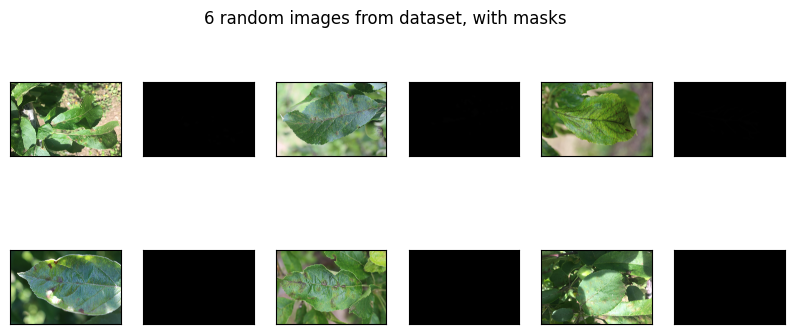

In [10]:
plot_random_scab(img_name=img_name_system, mask_name=mask_name_system)

(1365, 2048, 3)
(1365, 2048)


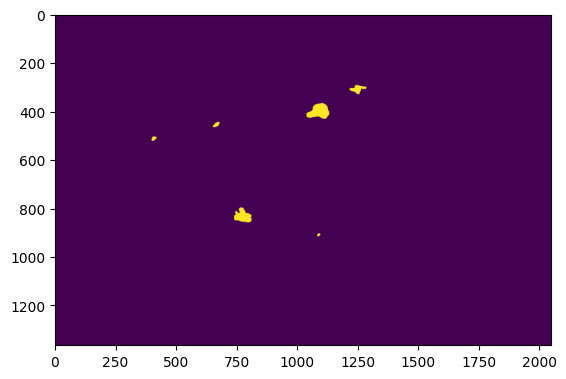

In [20]:
# trying different dataset
img = Image.open(path_to_masks + mask_name_system + "0.png")
# plt.imshow(img)

img_array = np.array(img)
print(img_array.shape)
gray_img = np.mean(img_array, axis=2)
print(gray_img.shape)

plt.imshow(gray_img)